## Build a Python program that reads a dataset, performs basic data cleaning, analysis, and visualization.

### Dataset = 'StudentsPerformance.csv'

#### 1. Importting important libraries, file & reading

In [9]:
import pandas as pd 
df =pd.read_csv('StudentsPerformance.csv')
print('Total number of entries: ', df.shape[0], '\n')
print('Total number of columns: ', df.shape[1], '\n')
print('The first five rows\n',df.head())
print('The last five rows\n',df.tail())

Total number of entries:  1000 

Total number of columns:  8 

The first five rows
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
The last five rows
      gender race/ethnicity parental level of education 

#### 2. Performing the Basic Cleaing 

In [11]:
df.fillna(0)           # Fill missing values with 0

'''
# Formatting the dataset -old option
for i in range(len(df)):
    if df['gender'][i] == 'male':
        df['gender'][i] = 'M'
    elif df['gender'][i] == 'female':
        df['gender'][i] = 'F'
'''
# formatting the dataset -py3.0 option

#Changeing male/female --> M/F
for i in range(len(df)):
    if df.loc[i, 'gender'] == 'male':
        df.loc[i, 'gender'] = 'M'
    elif df.loc[i, 'gender'] == 'female':
        df.loc[i, 'gender'] = 'F'

df =df.drop('lunch', axis=1)   #Removing column 'lunch'
df =df.drop('test preparation course', axis=1)  #Removing column 'test preparation course'

df['race/ethnicity'] = df['race/ethnicity'].str.split().str[1]       #splitting and taking the last letter ONLY



 
print('The first five rows\n',df.head())

The first five rows
   gender race/ethnicity parental level of education  math score  \
0      F              B           bachelor's degree          72   
1      F              C                some college          69   
2      F              B             master's degree          90   
3      M              A          associate's degree          47   
4      M              C                some college          76   

   reading score  writing score  
0             72             74  
1             90             88  
2             95             93  
3             57             44  
4             78             75  


#### 3. Exploratory Data Analysis (EDA)

In [13]:
#Getting basic statistics 
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [15]:
#Filterring and getting insight of dataset 
grouped_byGender = df.groupby('gender').mean(numeric_only=True)   #numeric_only=True only calculates for numeric columns
grouped_by_parentEDU = df.groupby('parental level of education').mean(numeric_only=True)

print('The average scores of different subjects based on gender (Male/Female):\n', grouped_byGender, '\n')
print('The average scores of different subjects based on parental level of education:\n', grouped_by_parentEDU)

The average scores of different subjects based on gender (Male/Female):
         math score  reading score  writing score
gender                                          
F        63.633205      72.608108      72.467181
M        68.728216      65.473029      63.311203 

The average scores of different subjects based on parental level of education:
                              math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


In [17]:
#Population sizes of different catogaries 
# Group by 'Gender' 
gender_count = df.groupby('gender').size()  
print(gender_count.index)
print(gender_count.values, '\n')

# Group by parental EDU
p_edu_count = df.groupby('parental level of education').size()  
print(p_edu_count.index)
print(p_edu_count.values)

Index(['F', 'M'], dtype='object', name='gender')
[518 482] 

Index(['associate's degree', 'bachelor's degree', 'high school',
       'master's degree', 'some college', 'some high school'],
      dtype='object', name='parental level of education')
[222 118 196  59 226 179]


#### 4. Data Visualization:

In [3]:
import matplotlib.pyplot as plt

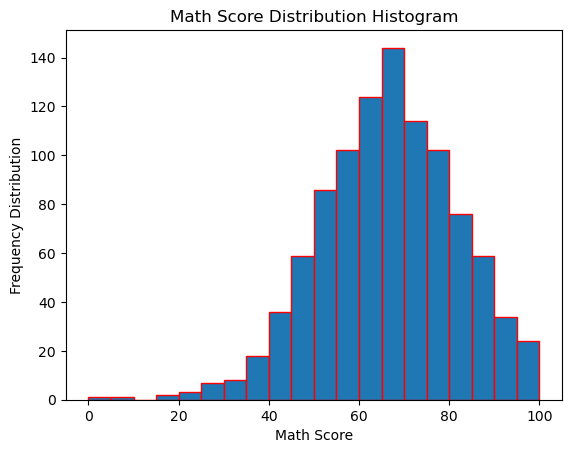

In [19]:
#Hitogram for distribution of math score 
x_math_score = df['math score']
plt.xlabel('Math Score')
plt.ylabel('Frequency Distribution')
plt.title('Math Score Distribution Histogram')
plt.hist(x_math_score, bins=20, edgecolor='red')
plt.show()

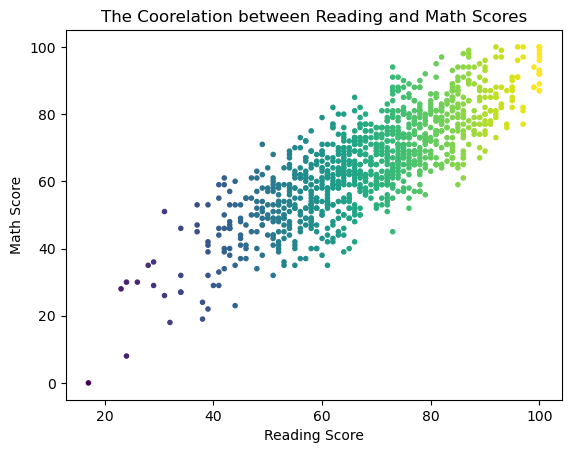

In [21]:
#Scatter diagram for reading--math scores 
xScat_reading_score = df['reading score']
yScat_math_score = df['math score']
#colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'gray']
plt.scatter(xScat_reading_score, yScat_math_score, c=xScat_reading_score, cmap='viridis', marker='.')  #cmap gives different colours
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('The Coorelation between Reading and Math Scores')

plt.show()

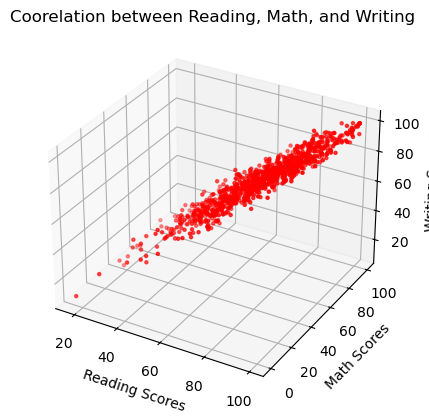

In [23]:
# a 3D scatter diagram for all three subjects 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

reading_scores =df['reading score']
writing_scores =df['writing score']
math_scores =df['math score']

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(reading_scores, math_scores, writing_scores, c='red', marker='.')

# Labels
ax.set_xlabel('Reading Scores')
ax.set_ylabel('Math Scores')
ax.set_zlabel('Writing Scores')
ax.set_title('Coorelation between Reading, Math, and Writing')

# Show plot
plt.show()

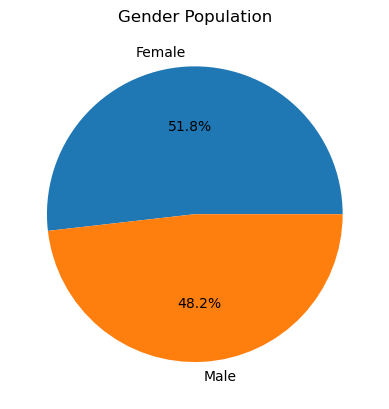

In [25]:
# a pie chart for male:female population 
labels = ['Female', 'Male']
sizes = [518, 482]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Gender Population")
plt.show()

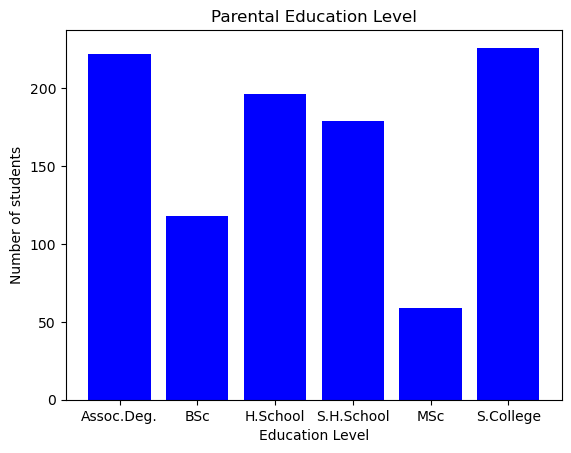

In [27]:
# A bar chart for Parental Education Level Population
categories = ['Assoc.Deg.', 'BSc', 'H.School', 'S.H.School','MSc', 'S.College']
value = [222, 118, 196, 179,  59, 226]
plt.bar(categories, value, color='blue')
plt.xlabel('Education Level')
plt.ylabel('Number of students')
plt.title("Parental Education Level")

plt.show()

In [5]:
import numpy as np

The average scores of different subjects based on gender (Male/Female):
         math score  reading score  writing score
gender                                          
F        63.633205      72.608108      72.467181
M        68.728216      65.473029      63.311203 

The average scores of different subjects based on parental level of education:
                              math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268

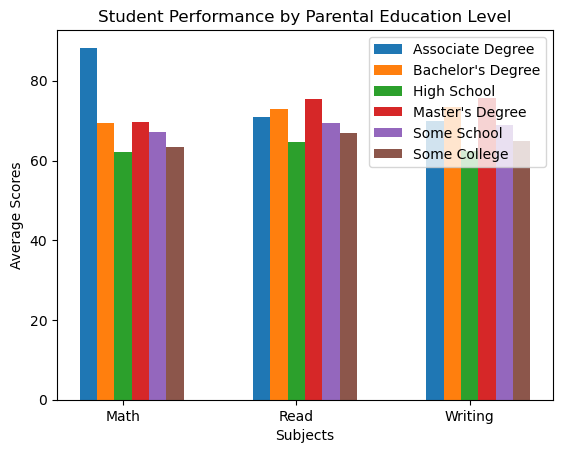

In [33]:
# Dictionaries containing performance data for different parental education levels
associate = {'Math': 88.2883, 'Read': 70.927928, 'Writing': 69.896396}
bsc = {'Math': 69.389831, 'Read': 73.000000, 'Writing': 73.381356}
hSchool = {'Math': 62.137755, 'Read': 64.704082, 'Writing': 62.448980}
msc = {'Math': 69.745763, 'Read': 75.372881, 'Writing': 75.677966}
sSchool = {'Math': 67.128319, 'Read': 69.460177, 'Writing': 68.840708}
sCollege = {'Math': 63.497207, 'Read': 66.938547, 'Writing': 64.888268}

# Categories and data for each group
categories = list(associate.keys())  # 'Math', 'Read', 'Writing'
associate_values = list(associate.values())
bsc_values = list(bsc.values())
hSchool_values = list(hSchool.values())
msc_values = list(msc.values())
sSchool_values = list(sSchool.values())
sCollege_values = list(sCollege.values())

# Number of bars in each group
n_groups = len(categories)

# Creating an index for the group positions
index = np.arange(n_groups)
bar_width = 0.10  # Width of each bar

# Plotting multiple bars for each group
plt.bar(index, associate_values, bar_width, label='Associate Degree')
plt.bar(index + bar_width, bsc_values, bar_width, label='Bachelor\'s Degree')
plt.bar(index + 2 * bar_width, hSchool_values, bar_width, label='High School')
plt.bar(index + 3 * bar_width, msc_values, bar_width, label='Master\'s Degree')
plt.bar(index + 4 * bar_width, sSchool_values, bar_width, label='Some School')
plt.bar(index + 5 * bar_width, sCollege_values, bar_width, label='Some College')

# Adding labels and title
plt.xlabel('Subjects')
plt.ylabel('Average Scores')
plt.title('Student Performance by Parental Education Level')

# Adding tick labels for subjects
plt.xticks(index + 2 * bar_width, categories)

# Adding a legend to identify the education levels
plt.legend()

# Show the plot
plt.show()
